# Fluid flow experiments

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import math 

In [3]:
def laminar(R):
    return 64/(R)

In [4]:
import timeit

start = timeit.timeit()
print("time")
end = timeit.timeit()
print(end - start)

time
0.0003856999999953814


In [10]:
def graphR(R):
    Ra=np.arange(100, 10000, .1);
    k=0.01
    d=1
    C=Fluidflowx(Ra,k,d)
    D=Fluidflowx(Ra,10*k,d)
    E=Fluidflowx(Ra,0.01*k,d)
    plt.plot(Ra,C)
    C=Fluidflowx(Ra,k,d)
    D=Fluidflowx(Ra,10*k,d)
    E=Fluidflowx(Ra,0.01*k,d)
    F=Fluidflowx(Ra,100*k,d)
    plt.plot(Ra,F, label= "eD=1")
    plt.plot(Ra,D, label= "eD=0.1")
    plt.plot(Ra,C, label= "eD=0.01")
    plt.plot(Ra,E, label= "eD=0.001")
    plt.xlabel("Reynold's Number")
    plt.ylabel("Friction Factor")
    plt.title('Critical Zone')
    plt.legend()
    plt.sh
    Raa=np.log10(Ra)
    plt.plot(Raa,F, label= "eD=1")
    plt.plot(Raa,D, label= "eD=0.1")
    plt.plot(Raa,C, label= "eD=0.01")
    plt.plot(Raa,E, label= "eD=0.001")
    plt.xlabel("Reynold's Number")
    plt.ylabel("Friction Factor")
    plt.title('Critical Zone with log R')
    plt.legend()
    plt.show()

### Clamond Method

C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


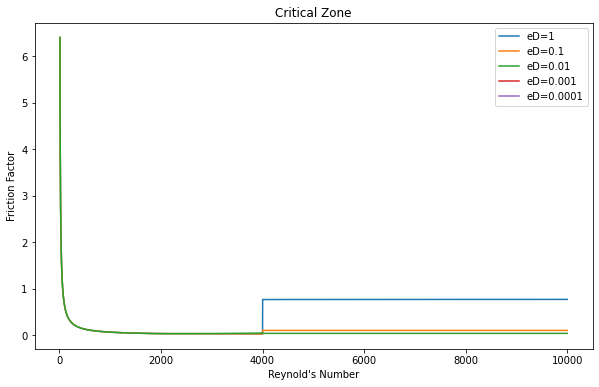

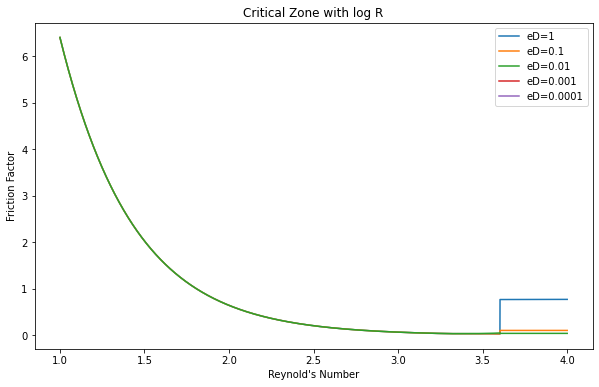

0.08350370000016483


In [44]:
def clamond(R,k,d):
    eD=k/d
    x1=eD*(R)* 0.123968186335417556;
    x2=(np.log(R))-0.779397488455682028;

    f = x2 - 0.2;
    g = (np.log(x1+f)+f-x2)/(1+x1+f);
    f = (f-(1+x1+f+0.5*g)*g*(x1+f))/(1+x1+f+g*(1+g/3));
    g = (np.log(x1+f)+f-x2)/(1+x1+f);
    f = (f-(1+x1+f+0.5*g)*g*(x1+f))/(1+x1+f+g*(1+g/3));
    f = 1.151292546497022842/f;                   
    f = f*f;   
    return f 

def simpcritical(R,k,d):
    X1=2000
    X2=4000
    L=laminar(X1)
    T=clamond(X2,k,d)
    a=(2/5)*(T-L)*(X2-X1)**-3
    b=(3/2)*(X2-X1)*a
    c=0
    d=laminar(X1)
    fc=a*(R-X1)**3+b*(R-X1)**2+c*(R-X1)+d
    f=fc
    return f

def Fluidflowx(R,k,d):  
        f=laminar(R)*(R <= 2000)+simpcritical(R,k,d)*(R <= 4000)*((R > 2000))+Brkic(R,k,d)*((R > 4000))
        return f


start = timeit.timeit() 


Ra=np.arange(10, 10000, .1);
k=0.01
d=1
C=Fluidflowx(Ra,k,d)
D=Fluidflowx(Ra,10*k,d)
E=Fluidflowx(Ra,0.01*k,d)
F=Fluidflowx(Ra,100*k,d)
G=Fluidflowx(Ra,0.001*k,d)
plt.figure(figsize=(10,6))
plt.plot(Ra,F, label= "eD=1")
plt.plot(Ra,D, label= "eD=0.1")
plt.plot(Ra,C, label= "eD=0.01")
plt.plot(Ra,E, label= "eD=0.001")
plt.plot(Ra,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Critical Zone')
plt.legend()
plt.show()
Raa=np.log10(Ra)
plt.figure(figsize=(10,6))
plt.plot(Raa,F, label= "eD=1")
plt.plot(Raa,D, label= "eD=0.1")
plt.plot(Raa,C, label= "eD=0.01")
plt.plot(Raa,E, label= "eD=0.001")
plt.plot(Raa,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Critical Zone with log R')
plt.legend()
plt.show()


end = timeit.timeit()
print(end - start)


runtime
0.00034010000013040553
runtime
-0.013187600000037492
runtime
0.04161810000005062
runtime
0.000675299999784329
runtime
-0.07720459999973173


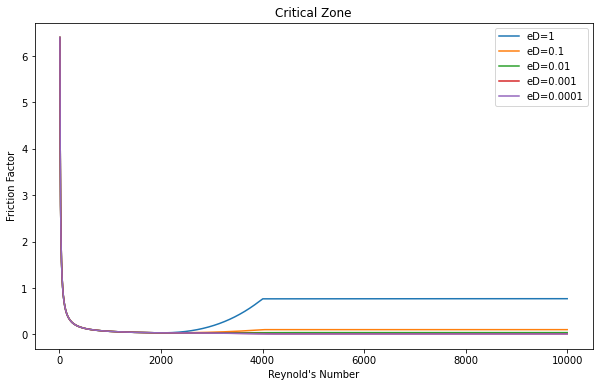

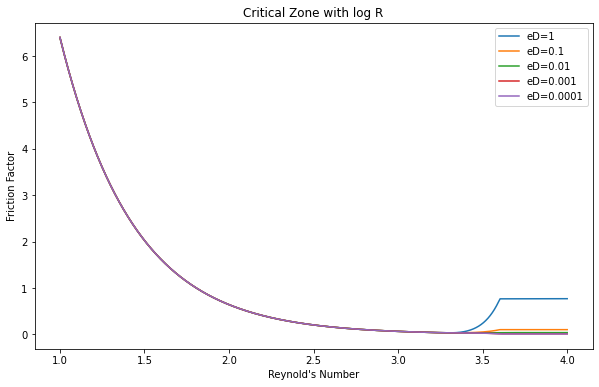

0.07673370000020441


In [31]:
def Brkic(R,k,d):
    eD=k/d
    S=np.log(R/(1.816*np.log(1.1*R)/np.log(1+1.1*R)))
    f=(-2*np.log10(eD/3.71)+(2.185*S/R))**(-2)
    return f

def simpcritical(R,k,d):
    X1=2000
    X2=4000
    L=laminar(X1)
    T=Brkic(X2,k,d)
    a=(2/5)*(T-L)*(X2-X1)**-3
    b=(3/2)*(X2-X1)*a
    c=0
    d=laminar(X1)
    fc=a*(R-X1)**3+b*(R-X1)**2+c*(R-X1)+d
    f=fc
    return f

def Fluidflowx(R,k,d):  
        f=laminar(R)*(R <= 2000)+simpcritical(R,k,d)*(R <= 4000)*((R > 2000))+Brkic(R,k,d)*((R > 4000))
        return f

start = timeit.timeit() 

Ra=np.arange(10, 10000, .1);
k=0.01
d=1
C=Fluidflowx(Ra,k,d)
D=Fluidflowx(Ra,10*k,d)
E=Fluidflowx(Ra,0.01*k,d)
F=Fluidflowx(Ra,100*k,d)
G=Fluidflowx(Ra,0.001*k,d)
plt.figure(figsize=(10,6))
plt.plot(Ra,F, label= "eD=1")
plt.plot(Ra,D, label= "eD=0.1")
plt.plot(Ra,C, label= "eD=0.01")
plt.plot(Ra,E, label= "eD=0.001")
plt.plot(Ra,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Critical Zone')
plt.legend()
plt.show()
Raa=np.log10(Ra)
plt.figure(figsize=(10,6))
plt.plot(Raa,F, label= "eD=1")
plt.plot(Raa,D, label= "eD=0.1")
plt.plot(Raa,C, label= "eD=0.01")
plt.plot(Raa,E, label= "eD=0.001")
plt.plot(Raa,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Critical Zone with log R')
plt.legend()
plt.show()

end = timeit.timeit()
print(end - start)

runtime
0.0005258000003323104
runtime
-0.05216230000019095
runtime
0.0014118999999936932
runtime
0.0016350000000784348
runtime
0.010605999999825144


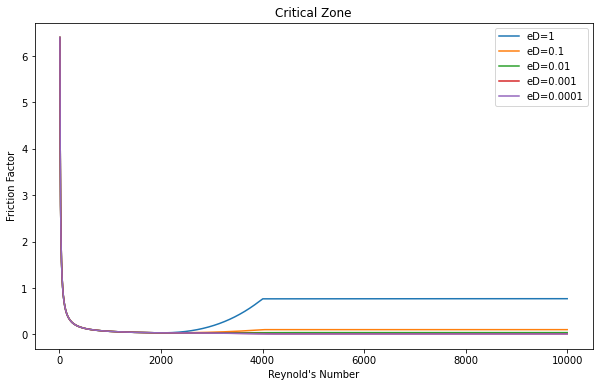

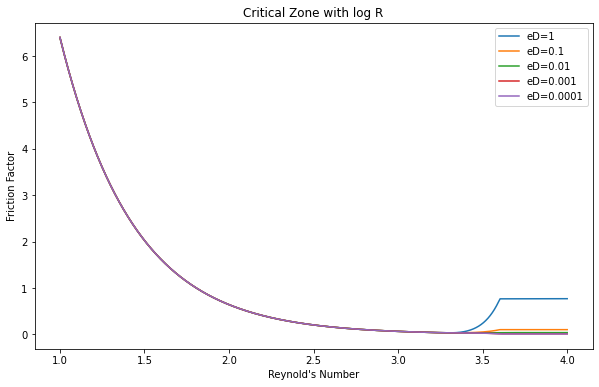

0.007429400000091846


In [30]:
def Brkic(R,k,d):
    eD=k/d
    S=np.log(R/(1.816*np.log(1.1*R)/np.log(1+1.1*R)))
    f=(-2*np.log10(eD/3.71)+(2.185*S/R))**(-2)
    return f

def simpcritical(R,k,d):
    X1=2000
    X2=4000
    L=laminar(X1)
    T=Brkic(X2,k,d)
    a=(2/5)*(T-L)*(X2-X1)**-3
    b=(3/2)*(X2-X1)*a
    c=0
    d=laminar(X1)
    fc=a*(R-X1)**3+b*(R-X1)**2+c*(R-X1)+d
    f=fc
    return f

def Fluidflowx(R,k,d):  
        f=laminar(R)*(R <= 2000)+simpcritical(R,k,d)*(R <= 4000)*((R > 2000))+Brkic(R,k,d)*((R > 4000))
        return f

start = timeit.timeit() 

Ra=np.arange(10, 10000, .1);
k=0.01
d=1
C=Fluidflowx(Ra,k,d)
D=Fluidflowx(Ra,10*k,d)
E=Fluidflowx(Ra,0.01*k,d)
F=Fluidflowx(Ra,100*k,d)
G=Fluidflowx(Ra,0.001*k,d)
plt.figure(figsize=(10,6))
plt.plot(Ra,F, label= "eD=1")
plt.plot(Ra,D, label= "eD=0.1")
plt.plot(Ra,C, label= "eD=0.01")
plt.plot(Ra,E, label= "eD=0.001")
plt.plot(Ra,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Critical Zone')
plt.legend()
plt.show()
Raa=np.log10(Ra)
plt.figure(figsize=(10,6))
plt.plot(Raa,F, label= "eD=1")
plt.plot(Raa,D, label= "eD=0.1")
plt.plot(Raa,C, label= "eD=0.01")
plt.plot(Raa,E, label= "eD=0.001")
plt.plot(Raa,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Critical Zone with log R')
plt.legend()
plt.show()

end = timeit.timeit()
print(end - start)

### Brkic Method

runtime
0.0005258000003323104
runtime
-0.05216230000019095
runtime
0.0014118999999936932
runtime
0.0016350000000784348
runtime
0.010605999999825144


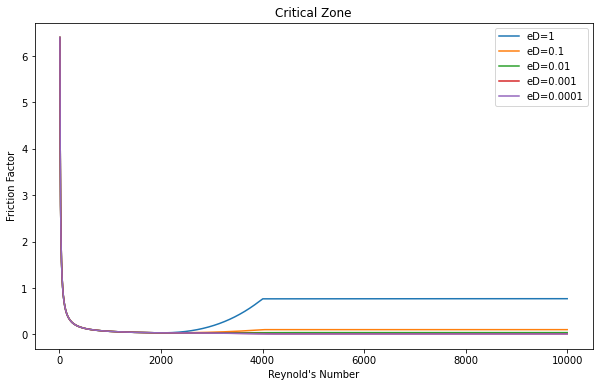

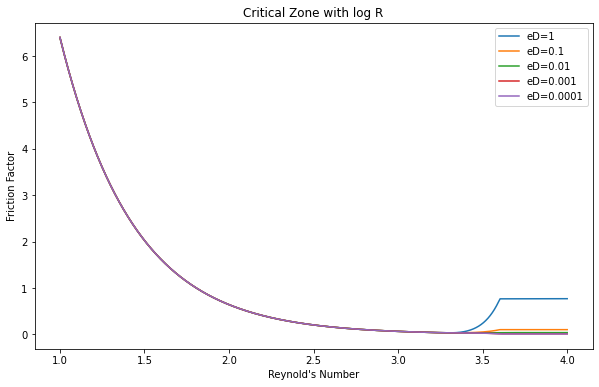

0.007429400000091846


In [30]:
def Brkic(R,k,d):
    eD=k/d
    S=np.log(R/(1.816*np.log(1.1*R)/np.log(1+1.1*R)))
    f=(-2*np.log10(eD/3.71)+(2.185*S/R))**(-2)
    return f

def simpcritical(R,k,d):
    X1=2000
    X2=4000
    L=laminar(X1)
    T=Brkic(X2,k,d)
    a=(2/5)*(T-L)*(X2-X1)**-3
    b=(3/2)*(X2-X1)*a
    c=0
    d=laminar(X1)
    fc=a*(R-X1)**3+b*(R-X1)**2+c*(R-X1)+d
    f=fc
    return f

def Fluidflowx(R,k,d):  
        f=laminar(R)*(R <= 2000)+simpcritical(R,k,d)*(R <= 4000)*((R > 2000))+Brkic(R,k,d)*((R > 4000))
        return f

start = timeit.timeit() 

Ra=np.arange(10, 10000, .1);
k=0.01
d=1
C=Fluidflowx(Ra,k,d)
D=Fluidflowx(Ra,10*k,d)
E=Fluidflowx(Ra,0.01*k,d)
F=Fluidflowx(Ra,100*k,d)
G=Fluidflowx(Ra,0.001*k,d)
plt.figure(figsize=(10,6))
plt.plot(Ra,F, label= "eD=1")
plt.plot(Ra,D, label= "eD=0.1")
plt.plot(Ra,C, label= "eD=0.01")
plt.plot(Ra,E, label= "eD=0.001")
plt.plot(Ra,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Critical Zone')
plt.legend()
plt.show()
Raa=np.log10(Ra)
plt.figure(figsize=(10,6))
plt.plot(Raa,F, label= "eD=1")
plt.plot(Raa,D, label= "eD=0.1")
plt.plot(Raa,C, label= "eD=0.01")
plt.plot(Raa,E, label= "eD=0.001")
plt.plot(Raa,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Critical Zone with log R')
plt.legend()
plt.show()

end = timeit.timeit()
print(end - start)

### Swamee-Jain Method

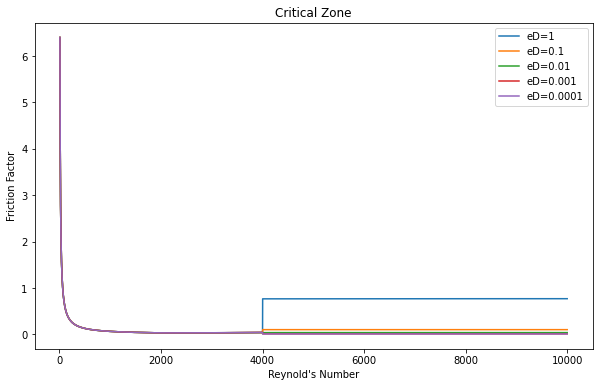

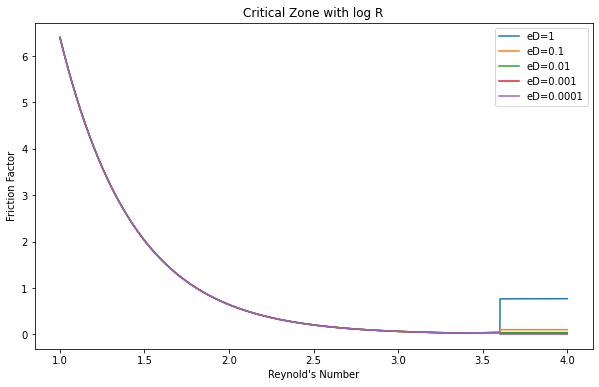

0.02749089999952048


In [45]:
def JainSwamee(R,k,d):
    eD=k/d
    f=-2*np.log10((eD/(3715))+(5.74/(R)**0.9))
    f=1/(f*f)
    return f

def simpcritical(R,k,d):
    X1=2000
    X2=4000
    L=laminar(X1)
    T=JainSwamee(4000,k,d)
    a=(2/5)*(T-L)*(X2-X1)**-3
    b=(3/2)*(X2-X1)*a
    c=0
    d=laminar(X1)
    fc=a*(R-X1)**3+b*(R-X1)**2+c*(R-X1)+d
    f=fc
    return f

def Fluidflowx(R,k,d):  
        f=laminar(R)*(R <= 2000)+simpcritical(R,k,d)*(R <= 4000)*((R > 2000))+Brkic(R,k,d)*((R > 4000))
        return f


start = timeit.timeit() 
Ra=np.arange(10, 10000, .1);
k=0.01
d=1
C=Fluidflowx(Ra,k,d)
D=Fluidflowx(Ra,10*k,d)
E=Fluidflowx(Ra,0.01*k,d)
F=Fluidflowx(Ra,100*k,d)
G=Fluidflowx(Ra,0.001*k,d)
plt.figure(figsize=(10,6))
plt.plot(Ra,F, label= "eD=1")
plt.plot(Ra,D, label= "eD=0.1")
plt.plot(Ra,C, label= "eD=0.01")
plt.plot(Ra,E, label= "eD=0.001")
plt.plot(Ra,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Critical Zone')
plt.legend()
plt.show()
Raa=np.log10(Ra)
plt.figure(figsize=(10,6))
plt.plot(Raa,F, label= "eD=1")
plt.plot(Raa,D, label= "eD=0.1")
plt.plot(Raa,C, label= "eD=0.01")
plt.plot(Raa,E, label= "eD=0.001")
plt.plot(Raa,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Critical Zone with log R')
plt.legend()
plt.show()

end = timeit.timeit()
print(end - start)

runtime
0.0005258000003323104
runtime
-0.05216230000019095
runtime
0.0014118999999936932
runtime
0.0016350000000784348
runtime
0.010605999999825144


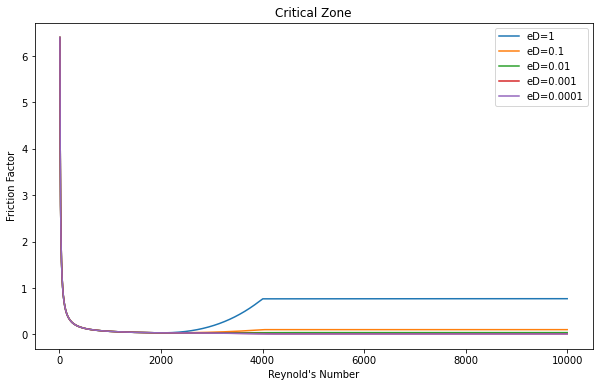

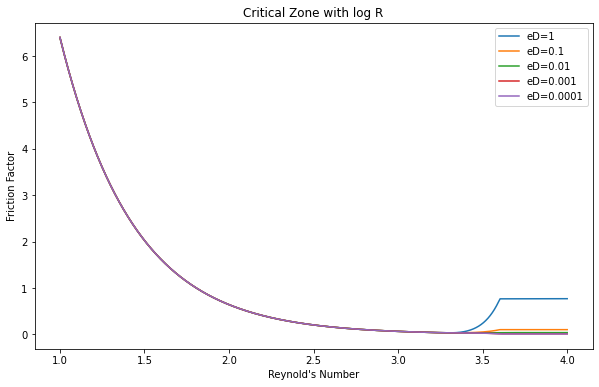

0.007429400000091846


In [30]:
def Brkic(R,k,d):
    eD=k/d
    S=np.log(R/(1.816*np.log(1.1*R)/np.log(1+1.1*R)))
    f=(-2*np.log10(eD/3.71)+(2.185*S/R))**(-2)
    return f

def simpcritical(R,k,d):
    X1=2000
    X2=4000
    L=laminar(X1)
    T=Brkic(X2,k,d)
    a=(2/5)*(T-L)*(X2-X1)**-3
    b=(3/2)*(X2-X1)*a
    c=0
    d=laminar(X1)
    fc=a*(R-X1)**3+b*(R-X1)**2+c*(R-X1)+d
    f=fc
    return f

def Fluidflowx(R,k,d):  
        f=laminar(R)*(R <= 2000)+simpcritical(R,k,d)*(R <= 4000)*((R > 2000))+Brkic(R,k,d)*((R > 4000))
        return f

start = timeit.timeit() 

Ra=np.arange(10, 10000, .1);
k=0.01
d=1
C=Fluidflowx(Ra,k,d)
D=Fluidflowx(Ra,10*k,d)
E=Fluidflowx(Ra,0.01*k,d)
F=Fluidflowx(Ra,100*k,d)
G=Fluidflowx(Ra,0.001*k,d)
plt.figure(figsize=(10,6))
plt.plot(Ra,F, label= "eD=1")
plt.plot(Ra,D, label= "eD=0.1")
plt.plot(Ra,C, label= "eD=0.01")
plt.plot(Ra,E, label= "eD=0.001")
plt.plot(Ra,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Critical Zone')
plt.legend()
plt.show()
Raa=np.log10(Ra)
plt.figure(figsize=(10,6))
plt.plot(Raa,F, label= "eD=1")
plt.plot(Raa,D, label= "eD=0.1")
plt.plot(Raa,C, label= "eD=0.01")
plt.plot(Raa,E, label= "eD=0.001")
plt.plot(Raa,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Critical Zone with log R')
plt.legend()
plt.show()

end = timeit.timeit()
print(end - start)

### Serghides1

runtime
0.0005472000000281696
runtime
0.003011199999946257
runtime
0.03018629999996847
runtime
-0.06854319999979452
runtime
0.000305800000205636


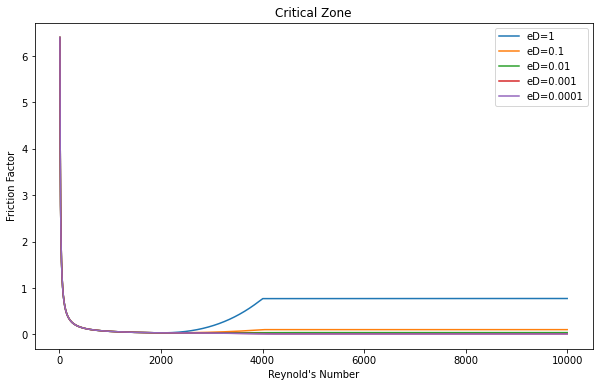

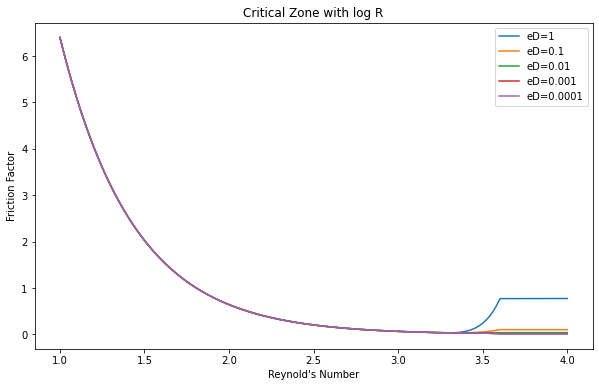

0.02785360000007131


In [33]:
def Serghides1(R,k,d):
    eD=k/d
    psi1=-2*np.log10(eD/3.7)+12/R
    psi2=-2*np.log10(eD/3.7)+(2.51*psi1)/R
    psi3=-2*np.log10(eD/3.7)+(2.51*psi2)/R
    f=(psi1-((psi1-psi1)**2)/(psi3-2*psi2+psi1))**(-2)
    return f


def simpcritical(R,k,d):
    X1=2000
    X2=4000
    L=laminar(X1)
    T=Serghides1(4000,k,d)
    a=(2/5)*(T-L)*(X2-X1)**-3
    b=(3/2)*(X2-X1)*a
    c=0
    d=laminar(X1)
    fc=a*(R-X1)**3+b*(R-X1)**2+c*(R-X1)+d
    f=fc
    return f

def Fluidflowx(R,k,d):  
        f=laminar(R)*(R <= 2000)+simpcritical(R,k,d)*(R <= 4000)*((R > 2000))+Brkic(R,k,d)*((R > 4000))
        return f


start = timeit.timeit() 
Ra=np.arange(10, 10000, .1);
k=0.01
d=1
C=Fluidflowx(Ra,k,d)
D=Fluidflowx(Ra,10*k,d)
E=Fluidflowx(Ra,0.01*k,d)
F=Fluidflowx(Ra,100*k,d)
G=Fluidflowx(Ra,0.001*k,d)
plt.figure(figsize=(10,6))
plt.plot(Ra,F, label= "eD=1")
plt.plot(Ra,D, label= "eD=0.1")
plt.plot(Ra,C, label= "eD=0.01")
plt.plot(Ra,E, label= "eD=0.001")
plt.plot(Ra,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Critical Zone')
plt.legend()
plt.show()
Raa=np.log10(Ra)
plt.figure(figsize=(10,6))
plt.plot(Raa,F, label= "eD=1")
plt.plot(Raa,D, label= "eD=0.1")
plt.plot(Raa,C, label= "eD=0.01")
plt.plot(Raa,E, label= "eD=0.001")
plt.plot(Raa,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Critical Zone with log R')
plt.legend()
plt.show()


end = timeit.timeit()
print(end - start)

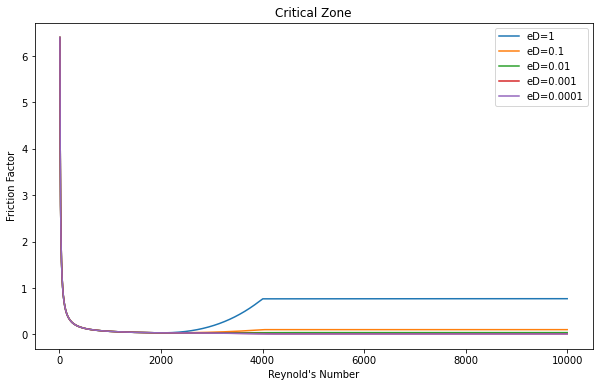

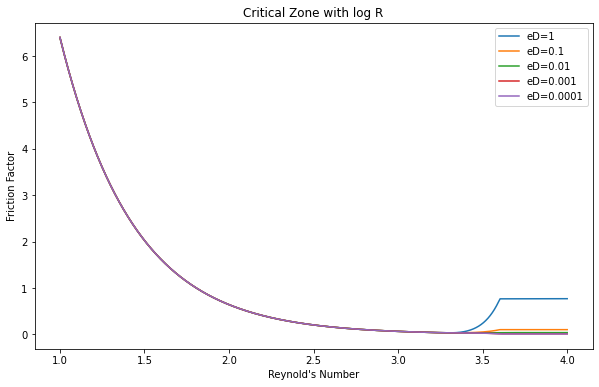

0.0016163999998752843


In [46]:
def Brkic(R,k,d):
    eD=k/d
    S=np.log(R/(1.816*np.log(1.1*R)/np.log(1+1.1*R)))
    f=(-2*np.log10(eD/3.71)+(2.185*S/R))**(-2)
    return f

def simpcritical(R,k,d):
    X1=2000
    X2=4000
    L=laminar(X1)
    T=Brkic(X2,k,d)
    a=(2/5)*(T-L)*(X2-X1)**-3
    b=(3/2)*(X2-X1)*a
    c=0
    d=laminar(X1)
    fc=a*(R-X1)**3+b*(R-X1)**2+c*(R-X1)+d
    f=fc
    return f

def Fluidflowx(R,k,d):  
        f=laminar(R)*(R <= 2000)+simpcritical(R,k,d)*(R <= 4000)*((R > 2000))+Brkic(R,k,d)*((R > 4000))
        return f

start = timeit.timeit() 

Ra=np.arange(10, 10000, .1);
k=0.01
d=1
C=Fluidflowx(Ra,k,d)
D=Fluidflowx(Ra,10*k,d)
E=Fluidflowx(Ra,0.01*k,d)
F=Fluidflowx(Ra,100*k,d)
G=Fluidflowx(Ra,0.001*k,d)
plt.figure(figsize=(10,6))
plt.plot(Ra,F, label= "eD=1")
plt.plot(Ra,D, label= "eD=0.1")
plt.plot(Ra,C, label= "eD=0.01")
plt.plot(Ra,E, label= "eD=0.001")
plt.plot(Ra,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Critical Zone')
plt.legend()
plt.show()
Raa=np.log10(Ra)
plt.figure(figsize=(10,6))
plt.plot(Raa,F, label= "eD=1")
plt.plot(Raa,D, label= "eD=0.1")
plt.plot(Raa,C, label= "eD=0.01")
plt.plot(Raa,E, label= "eD=0.001")
plt.plot(Raa,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Critical Zone with log R')
plt.legend()
plt.show()

end = timeit.timeit()
print(end - start)

runtime
0.0005258000003323104
runtime
-0.05216230000019095
runtime
0.0014118999999936932
runtime
0.0016350000000784348
runtime
0.010605999999825144


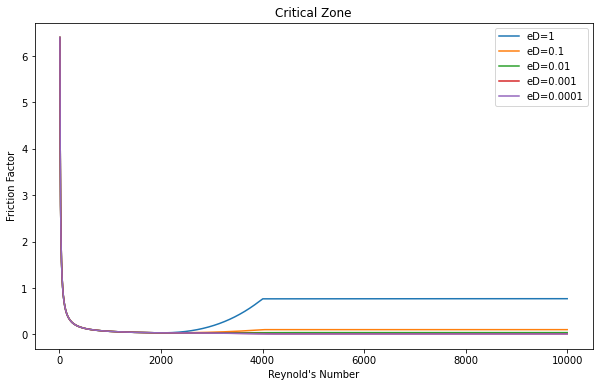

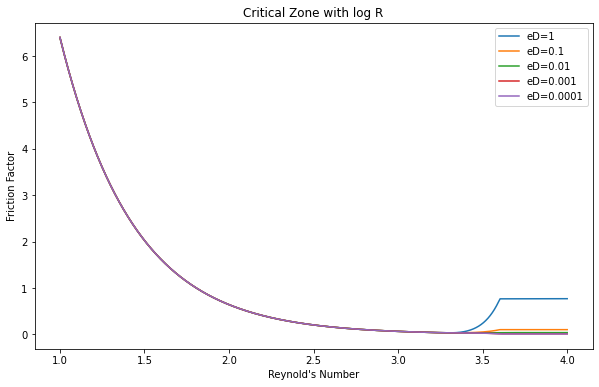

0.007429400000091846


In [30]:
def Brkic(R,k,d):
    eD=k/d
    S=np.log(R/(1.816*np.log(1.1*R)/np.log(1+1.1*R)))
    f=(-2*np.log10(eD/3.71)+(2.185*S/R))**(-2)
    return f

def simpcritical(R,k,d):
    X1=2000
    X2=4000
    L=laminar(X1)
    T=Brkic(X2,k,d)
    a=(2/5)*(T-L)*(X2-X1)**-3
    b=(3/2)*(X2-X1)*a
    c=0
    d=laminar(X1)
    fc=a*(R-X1)**3+b*(R-X1)**2+c*(R-X1)+d
    f=fc
    return f

def Fluidflowx(R,k,d):  
        f=laminar(R)*(R <= 2000)+simpcritical(R,k,d)*(R <= 4000)*((R > 2000))+Brkic(R,k,d)*((R > 4000))
        return f

start = timeit.timeit() 

Ra=np.arange(10, 10000, .1);
k=0.01
d=1
C=Fluidflowx(Ra,k,d)
D=Fluidflowx(Ra,10*k,d)
E=Fluidflowx(Ra,0.01*k,d)
F=Fluidflowx(Ra,100*k,d)
G=Fluidflowx(Ra,0.001*k,d)
plt.figure(figsize=(10,6))
plt.plot(Ra,F, label= "eD=1")
plt.plot(Ra,D, label= "eD=0.1")
plt.plot(Ra,C, label= "eD=0.01")
plt.plot(Ra,E, label= "eD=0.001")
plt.plot(Ra,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Critical Zone')
plt.legend()
plt.show()
Raa=np.log10(Ra)
plt.figure(figsize=(10,6))
plt.plot(Raa,F, label= "eD=1")
plt.plot(Raa,D, label= "eD=0.1")
plt.plot(Raa,C, label= "eD=0.01")
plt.plot(Raa,E, label= "eD=0.001")
plt.plot(Raa,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Critical Zone with log R')
plt.legend()
plt.show()

end = timeit.timeit()
print(end - start)

runtime
0.0005258000003323104
runtime
-0.05216230000019095
runtime
0.0014118999999936932
runtime
0.0016350000000784348
runtime
0.010605999999825144


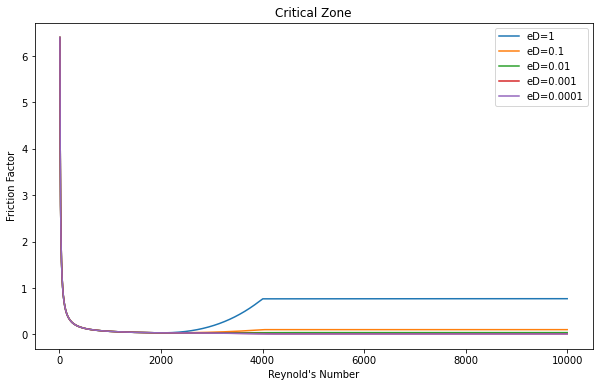

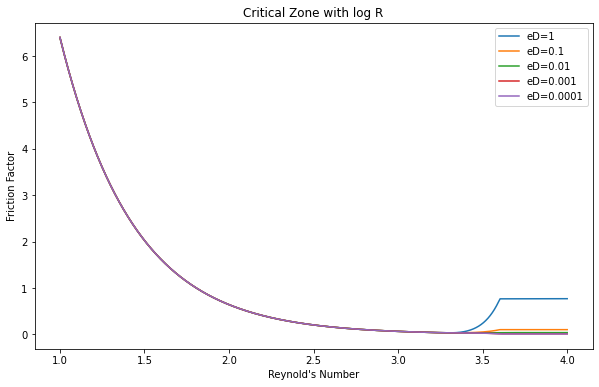

0.007429400000091846


In [30]:
def Brkic(R,k,d):
    eD=k/d
    S=np.log(R/(1.816*np.log(1.1*R)/np.log(1+1.1*R)))
    f=(-2*np.log10(eD/3.71)+(2.185*S/R))**(-2)
    return f

def simpcritical(R,k,d):
    X1=2000
    X2=4000
    L=laminar(X1)
    T=Brkic(X2,k,d)
    a=(2/5)*(T-L)*(X2-X1)**-3
    b=(3/2)*(X2-X1)*a
    c=0
    d=laminar(X1)
    fc=a*(R-X1)**3+b*(R-X1)**2+c*(R-X1)+d
    f=fc
    return f

def Fluidflowx(R,k,d):  
        f=laminar(R)*(R <= 2000)+simpcritical(R,k,d)*(R <= 4000)*((R > 2000))+Brkic(R,k,d)*((R > 4000))
        return f

start = timeit.timeit() 

Ra=np.arange(10, 10000, .1);
k=0.01
d=1
C=Fluidflowx(Ra,k,d)
D=Fluidflowx(Ra,10*k,d)
E=Fluidflowx(Ra,0.01*k,d)
F=Fluidflowx(Ra,100*k,d)
G=Fluidflowx(Ra,0.001*k,d)
plt.figure(figsize=(10,6))
plt.plot(Ra,F, label= "eD=1")
plt.plot(Ra,D, label= "eD=0.1")
plt.plot(Ra,C, label= "eD=0.01")
plt.plot(Ra,E, label= "eD=0.001")
plt.plot(Ra,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Critical Zone')
plt.legend()
plt.show()
Raa=np.log10(Ra)
plt.figure(figsize=(10,6))
plt.plot(Raa,F, label= "eD=1")
plt.plot(Raa,D, label= "eD=0.1")
plt.plot(Raa,C, label= "eD=0.01")
plt.plot(Raa,E, label= "eD=0.001")
plt.plot(Raa,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Critical Zone with log R')
plt.legend()
plt.show()

end = timeit.timeit()
print(end - start)

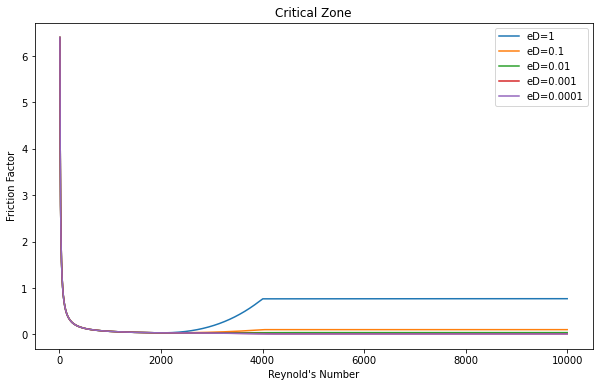

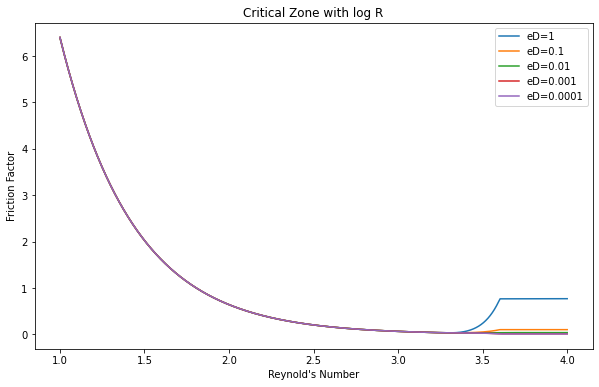

graph runtime
0.036934499999915715


In [47]:
def Brkic(R,k,d):
    eD=k/d
    S=np.log(R/(1.816*np.log(1.1*R)/np.log(1+1.1*R)))
    f=(-2*np.log10(eD/3.71)+(2.185*S/R))**(-2)
    return f

def simpcritical(R,k,d):
    X1=2000
    X2=4000
    L=laminar(X1)
    T=Brkic(X2,k,d)
    a=(2/5)*(T-L)*(X2-X1)**-3
    b=(3/2)*(X2-X1)*a
    c=0
    d=laminar(X1)
    fc=a*(R-X1)**3+b*(R-X1)**2+c*(R-X1)+d
    f=fc
    return f

def Fluidflowx(R,k,d):  
        f=laminar(R)*(R <= 2000)+simpcritical(R,k,d)*(R <= 4000)*((R > 2000))+Brkic(R,k,d)*((R > 4000))
        end = timeit.timeit()
        return f

start = timeit.timeit() 

Ra=np.arange(10, 10000, .1);
k=0.01
d=1
C=Fluidflowx(Ra,k,d)
D=Fluidflowx(Ra,10*k,d)
E=Fluidflowx(Ra,0.01*k,d)
F=Fluidflowx(Ra,100*k,d)
G=Fluidflowx(Ra,0.001*k,d)
plt.figure(figsize=(10,6))
plt.plot(Ra,F, label= "eD=1")
plt.plot(Ra,D, label= "eD=0.1")
plt.plot(Ra,C, label= "eD=0.01")
plt.plot(Ra,E, label= "eD=0.001")
plt.plot(Ra,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Critical Zone')
plt.legend()
plt.show()
Raa=np.log10(Ra)
plt.figure(figsize=(10,6))
plt.plot(Raa,F, label= "eD=1")
plt.plot(Raa,D, label= "eD=0.1")
plt.plot(Raa,C, label= "eD=0.01")
plt.plot(Raa,E, label= "eD=0.001")
plt.plot(Raa,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Critical Zone with log R')
plt.legend()
plt.show()

end = timeit.timeit()
print("graph runtime")
print(end - start)

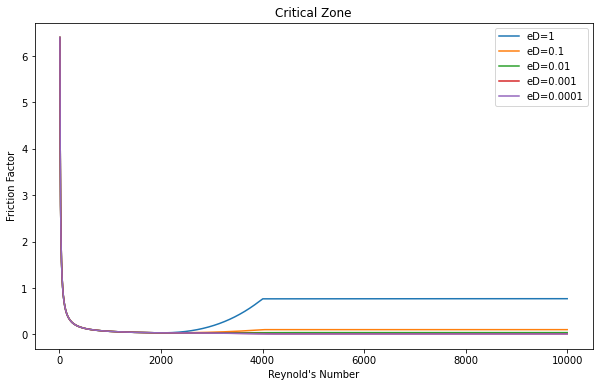

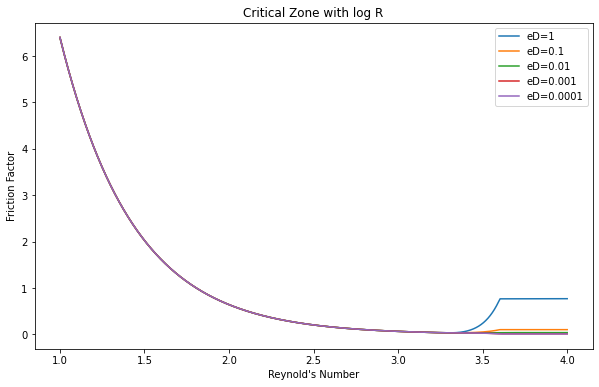

graph runtime
-0.0001305000000684231


In [48]:
def Brkic(R,k,d):
    eD=k/d
    S=np.log(R/(1.816*np.log(1.1*R)/np.log(1+1.1*R)))
    f=(-2*np.log10(eD/3.71)+(2.185*S/R))**(-2)
    return f

def simpcritical(R,k,d):
    X1=2000
    X2=4000
    L=laminar(X1)
    T=Brkic(X2,k,d)
    a=(2/5)*(T-L)*(X2-X1)**-3
    b=(3/2)*(X2-X1)*a
    c=0
    d=laminar(X1)
    fc=a*(R-X1)**3+b*(R-X1)**2+c*(R-X1)+d
    f=fc
    return f

def Fluidflowx(R,k,d):  
        f=laminar(R)*(R <= 2000)+simpcritical(R,k,d)*(R <= 4000)*((R > 2000))+Brkic(R,k,d)*((R > 4000))
        return f

start = timeit.timeit() 

Ra=np.arange(10, 10000, .1);
k=0.01
d=1
C=Fluidflowx(Ra,k,d)
D=Fluidflowx(Ra,10*k,d)
E=Fluidflowx(Ra,0.01*k,d)
F=Fluidflowx(Ra,100*k,d)
G=Fluidflowx(Ra,0.001*k,d)
plt.figure(figsize=(10,6))
plt.plot(Ra,F, label= "eD=1")
plt.plot(Ra,D, label= "eD=0.1")
plt.plot(Ra,C, label= "eD=0.01")
plt.plot(Ra,E, label= "eD=0.001")
plt.plot(Ra,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Critical Zone')
plt.legend()
plt.show()
Raa=np.log10(Ra)
plt.figure(figsize=(10,6))
plt.plot(Raa,F, label= "eD=1")
plt.plot(Raa,D, label= "eD=0.1")
plt.plot(Raa,C, label= "eD=0.01")
plt.plot(Raa,E, label= "eD=0.001")
plt.plot(Raa,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Critical Zone with log R')
plt.legend()
plt.show()

end = timeit.timeit()
print("graph runtime")
print(end - start)

function runtime
-0.00026590000015858095


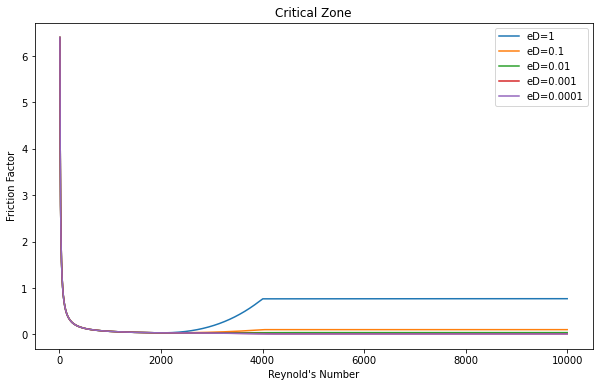

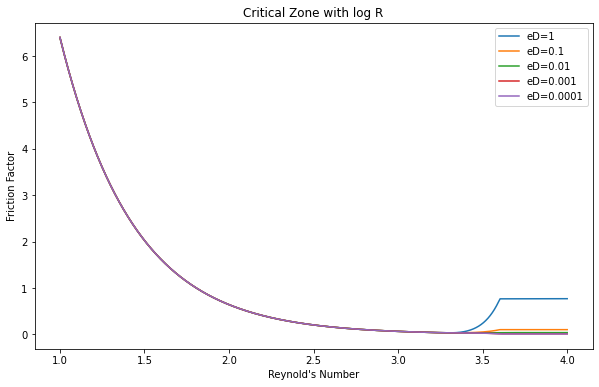

graph runtime
0.03632389999984298
full runtime
0.03646459999981744


In [42]:
start1 = timeit.timeit() 
def Brkic(R,k,d):
    eD=k/d
    S=np.log(R/(1.816*np.log(1.1*R)/np.log(1+1.1*R)))
    f=(-2*np.log10(eD/3.71)+(2.185*S/R))**(-2)
    return f

def simpcritical(R,k,d):
    X1=2000
    X2=4000
    L=laminar(X1)
    T=Brkic(X2,k,d)
    a=(2/5)*(T-L)*(X2-X1)**-3
    b=(3/2)*(X2-X1)*a
    c=0
    d=laminar(X1)
    fc=a*(R-X1)**3+b*(R-X1)**2+c*(R-X1)+d
    f=fc
    return f

def Fluidflowx(R,k,d):  
        f=laminar(R)*(R <= 2000)+simpcritical(R,k,d)*(R <= 4000)*((R > 2000))+Brkic(R,k,d)*((R > 4000))
        return f

end1 = timeit.timeit()
print("function runtime")
print(end1 - start1)
    
start2 = timeit.timeit() 

Ra=np.arange(10, 10000, .1);
k=0.01
d=1
C=Fluidflowx(Ra,k,d)
D=Fluidflowx(Ra,10*k,d)
E=Fluidflowx(Ra,0.01*k,d)
F=Fluidflowx(Ra,100*k,d)
G=Fluidflowx(Ra,0.001*k,d)
plt.figure(figsize=(10,6))
plt.plot(Ra,F, label= "eD=1")
plt.plot(Ra,D, label= "eD=0.1")
plt.plot(Ra,C, label= "eD=0.01")
plt.plot(Ra,E, label= "eD=0.001")
plt.plot(Ra,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Critical Zone')
plt.legend()
plt.show()
Raa=np.log10(Ra)
plt.figure(figsize=(10,6))
plt.plot(Raa,F, label= "eD=1")
plt.plot(Raa,D, label= "eD=0.1")
plt.plot(Raa,C, label= "eD=0.01")
plt.plot(Raa,E, label= "eD=0.001")
plt.plot(Raa,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Critical Zone with log R')
plt.legend()
plt.show()

end2 = timeit.timeit()
print("graph runtime")
print(end2 - start2)

print("full runtime")
print(end2 - start1)

### Dobromyslov

function runtime
0.0046821999999338


C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  


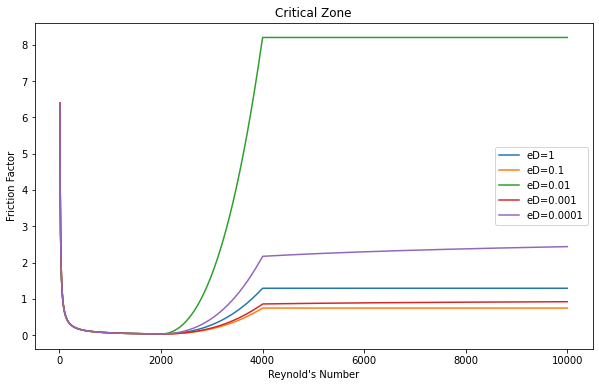

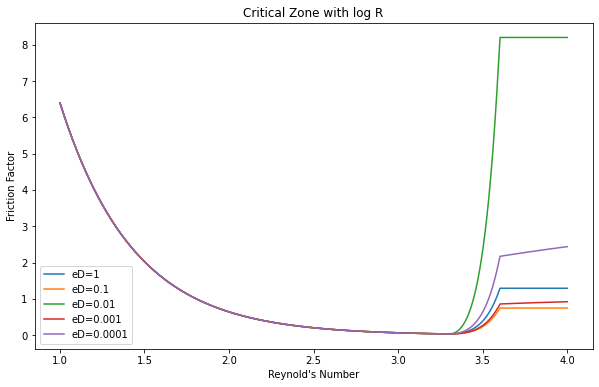

graph runtime
-0.0017902999993566482
full runtime
-0.0006435999998757325


In [51]:
start1 = timeit.timeit() 
def Dobromyslov(R,k,d):
    eD=k/d
    Rekv=500*(eD)
    B=(1+(np.log10(R)/np.log10(Rekv)))
    b=B*(B <= 2)+2*(B > 2)
    V=np.log10(3.7*eD)
    f=(0.5/V)*((b/2+(1.312*(2-b)*V)/(np.log10(R)-1)))
    f=1/(f*f)
    return f
    
def simpcritical(R,k,d):
    X1=2000
    X2=4000
    L=laminar(X1)
    T=Dobromyslov(X2,k,d)
    a=(2/5)*(T-L)*(X2-X1)**-3
    b=(3/2)*(X2-X1)*a
    c=0
    d=laminar(X1)
    fc=a*(R-X1)**3+b*(R-X1)**2+c*(R-X1)+d
    f=fc
    return f

def Fluidflowx(R,k,d):  
        f=laminar(R)*(R <= 2000)+simpcritical(R,k,d)*(R <= 4000)*((R > 2000))+Dobromyslov(R,k,d)*((R > 4000))
        return f

end1 = timeit.timeit()
print("function runtime")
print(end1 - start1)

start2 = timeit.timeit() 
Ra=np.arange(10, 10000, .1);
k=0.01
d=1
C=Fluidflowx(Ra,k,d)
D=Fluidflowx(Ra,10*k,d)
E=Fluidflowx(Ra,0.01*k,d)
F=Fluidflowx(Ra,100*k,d)
G=Fluidflowx(Ra,0.001*k,d)
plt.figure(figsize=(10,6))
plt.plot(Ra,F, label= "eD=1")
plt.plot(Ra,D, label= "eD=0.1")
plt.plot(Ra,C, label= "eD=0.01")
plt.plot(Ra,E, label= "eD=0.001")
plt.plot(Ra,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Critical Zone')
plt.legend()
plt.show()
Raa=np.log10(Ra)
plt.figure(figsize=(10,6))
plt.plot(Raa,F, label= "eD=1")
plt.plot(Raa,D, label= "eD=0.1")
plt.plot(Raa,C, label= "eD=0.01")
plt.plot(Raa,E, label= "eD=0.001")
plt.plot(Raa,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Critical Zone with log R')
plt.legend()
plt.show()


end2 = timeit.timeit()
print("graph runtime")
print(end2 - start2)

print("full runtime")
print(end2 - start1)

### Goudar & Sonnad (2008)

function runtime
0.003540600000633276


C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in double_scalars
  
C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  if __name__ == '__main__':
C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':
C:\Users\Pat\anaconda3\lib\site-packages\ip

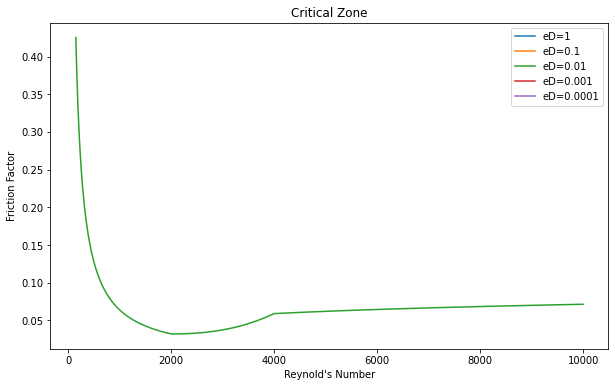

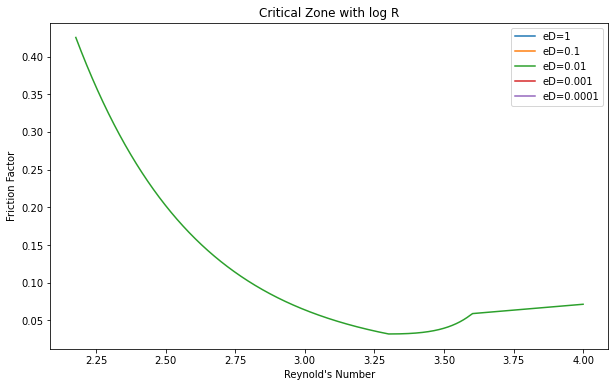

graph runtime
0.0205153000001701
full runtime
0.08375370000021576


In [52]:
start1 = timeit.timeit() 
def GoudarSonnad2(R,k,d):
    eD=k/d
    a=2/(np.log(10))
    b=eD/3.7
    da=np.log(10)*(R)/5.02
    s=b*da*np.log(da)
    q=s/(s**(s+1))
    g=b*da+np.log(d/q)
    z=np.log(q/g)
    dla=z*(g/(g+1)) 
    dcfa=dla*((1+((z/2)/((g+1)**2+(z/3)*(2*g-1)))))
    f=a-(np.log(da/q)+dcfa)
    f=1/(f*f)
    return f
    
def simpcritical(R,k,d):
    X1=2000
    X2=4000
    L=laminar(X1)
    T=GoudarSonnad2(X2,k,d)
    a=(2/5)*(T-L)*(X2-X1)**-3
    b=(3/2)*(X2-X1)*a
    c=0
    d=laminar(X1)
    fc=a*(R-X1)**3+b*(R-X1)**2+c*(R-X1)+d
    f=fc
    return f

def Fluidflowx(R,k,d):  
        f=laminar(R)*(R <= 2000)+simpcritical(R,k,d)*(R <= 4000)*((R > 2000))+GoudarSonnad2(R,k,d)*((R > 4000))
        return f



end1 = timeit.timeit()
print("function runtime")
print(end1 - start1)

start2 = timeit.timeit() 
Ra=np.arange(10, 10000, .1);
k=0.01
d=1
C=Fluidflowx(Ra,k,d)
D=Fluidflowx(Ra,10*k,d)
E=Fluidflowx(Ra,0.01*k,d)
F=Fluidflowx(Ra,100*k,d)
G=Fluidflowx(Ra,0.001*k,d)
plt.figure(figsize=(10,6))
plt.plot(Ra,F, label= "eD=1")
plt.plot(Ra,D, label= "eD=0.1")
plt.plot(Ra,C, label= "eD=0.01")
plt.plot(Ra,E, label= "eD=0.001")
plt.plot(Ra,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Critical Zone')
plt.legend()
plt.show()
Raa=np.log10(Ra)
plt.figure(figsize=(10,6))
plt.plot(Raa,F, label= "eD=1")
plt.plot(Raa,D, label= "eD=0.1")
plt.plot(Raa,C, label= "eD=0.01")
plt.plot(Raa,E, label= "eD=0.001")
plt.plot(Raa,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Critical Zone with log R')
plt.legend()
plt.show()


end2 = timeit.timeit()
print("graph runtime")
print(end2 - start2)

print("full runtime")
print(end2 - start1)

## Blasius

function runtime
-9.59999988481286e-06


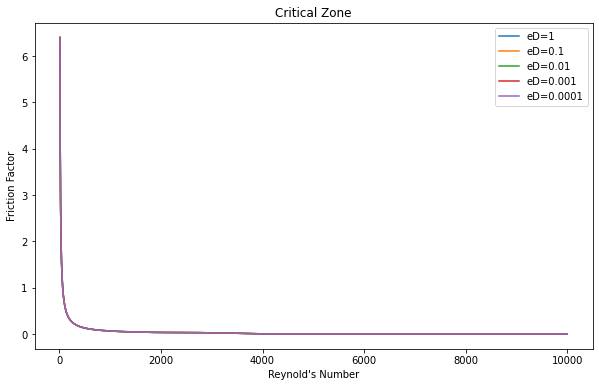

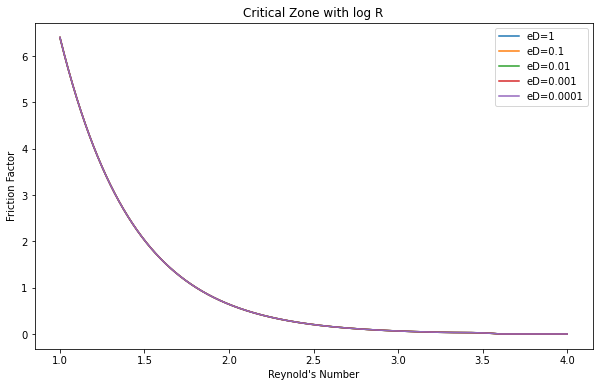

graph runtime
-0.0014646999998149113
full runtime
0.0018404000002192333


In [53]:
start1 = timeit.timeit() 
def Blasius(R,k):
    f=0.316/(R**(1/4))*(k==0)
    return f

def simpcritical(R,k,d):
    X1=2000
    X2=4000
    L=laminar(X1)
    T=Blasius(X2,k)
    a=(2/5)*(T-L)*(X2-X1)**-3
    b=(3/2)*(X2-X1)*a
    c=0
    d=laminar(X1)
    fc=a*(R-X1)**3+b*(R-X1)**2+c*(R-X1)+d
    f=fc
    return f

def Fluidflowx(R,k,d):  
        f=laminar(R)*(R <= 2000)+simpcritical(R,k,d)*(R <= 4000)*((R > 2000))+Blasius(R,k)*((R > 4000))
        return f

end1 = timeit.timeit()
print("function runtime")
print(end1 - start1)

start2 = timeit.timeit() 
Ra=np.arange(10, 10000, .1);
k=0.01
d=1
C=Fluidflowx(Ra,k,d)
D=Fluidflowx(Ra,10*k,d)
E=Fluidflowx(Ra,0.01*k,d)
F=Fluidflowx(Ra,100*k,d)
G=Fluidflowx(Ra,0.001*k,d)
plt.figure(figsize=(10,6))
plt.plot(Ra,F, label= "eD=1")
plt.plot(Ra,D, label= "eD=0.1")
plt.plot(Ra,C, label= "eD=0.01")
plt.plot(Ra,E, label= "eD=0.001")
plt.plot(Ra,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Critical Zone')
plt.legend()
plt.show()
Raa=np.log10(Ra)
plt.figure(figsize=(10,6))
plt.plot(Raa,F, label= "eD=1")
plt.plot(Raa,D, label= "eD=0.1")
plt.plot(Raa,C, label= "eD=0.01")
plt.plot(Raa,E, label= "eD=0.001")
plt.plot(Raa,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Critical Zone with log R')
plt.legend()
plt.show()


end2 = timeit.timeit()
print("graph runtime")
print(end2 - start2)

print("full runtime")
print(end2 - start1)



### Haaland Method

function runtime
0.0006517000001622364


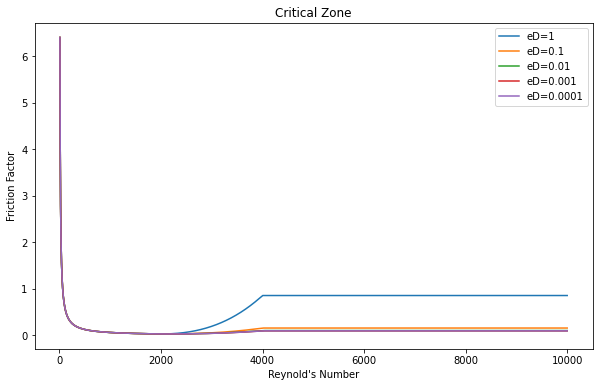

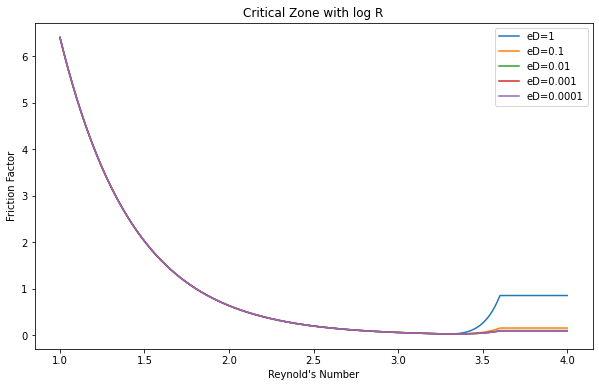

graph runtime
-0.034091800000169314
full runtime
-0.00023710000004939502


In [54]:
start1 = timeit.timeit() 
def haaland(R,k,d):
    eD=k/d
    f=-1.8*(np.log10(eD/3.7**1.11+69/R))
    f=1/(f*f)
    return f  


def simpcritical(R,k,d):
    X1=2000
    X2=4000
    L=laminar(X1)
    T=haaland(X2,k,d)
    a=(2/5)*(T-L)*(X2-X1)**-3
    b=(3/2)*(X2-X1)*a
    c=0
    d=laminar(X1)
    fc=a*(R-X1)**3+b*(R-X1)**2+c*(R-X1)+d
    f=fc
    return f

def Fluidflowx(R,k,d):  
        f=laminar(R)*(R <= 2000)+simpcritical(R,k,d)*(R <= 4000)*((R > 2000))+haaland(4000,k,d)*((R > 4000))
        return f


end1 = timeit.timeit()
print("function runtime")
print(end1 - start1)

start2 = timeit.timeit() 
Ra=np.arange(10, 10000, .1);
k=0.01
d=1
C=Fluidflowx(Ra,k,d)
D=Fluidflowx(Ra,10*k,d)
E=Fluidflowx(Ra,0.01*k,d)
F=Fluidflowx(Ra,100*k,d)
G=Fluidflowx(Ra,0.001*k,d)
plt.figure(figsize=(10,6))
plt.plot(Ra,F, label= "eD=1")
plt.plot(Ra,D, label= "eD=0.1")
plt.plot(Ra,C, label= "eD=0.01")
plt.plot(Ra,E, label= "eD=0.001")
plt.plot(Ra,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Critical Zone')
plt.legend()
plt.show()
Raa=np.log10(Ra)
plt.figure(figsize=(10,6))
plt.plot(Raa,F, label= "eD=1")
plt.plot(Raa,D, label= "eD=0.1")
plt.plot(Raa,C, label= "eD=0.01")
plt.plot(Raa,E, label= "eD=0.001")
plt.plot(Raa,G, label= "eD=0.0001")
plt.xlabel("Reynold's Number")
plt.ylabel("Friction Factor")
plt.title('Critical Zone with log R')
plt.legend()
plt.show()


end2 = timeit.timeit()
print("graph runtime")
print(end2 - start2)

print("full runtime")
print(end2 - start1)
